In [1]:
"""
PRE-COMPUTE SPECTROGRAMS TO SPEED UP TRAINING
Run this ONCE before training to cache all spectrograms
"""
import torch
import torchaudio
import torchvision.transforms as T
import pandas as pd
import numpy as np
from tqdm import tqdm
import os

print("🔧 Pre-computing Spectrograms...")

# Load dataset
SFM_CSV = "sfm_features.csv"
full_df = pd.read_csv(SFM_CSV)

# Audio Transforms
mel = torchaudio.transforms.MelSpectrogram(sample_rate=16000, n_fft=1024, n_mels=128, hop_length=512)
db = torchaudio.transforms.AmplitudeToDB()
resize = T.Resize((224, 224), antialias=True)

# Create output directory
os.makedirs("cached_spectrograms", exist_ok=True)

# Process all files
for idx, row in tqdm(full_df.iterrows(), total=len(full_df), desc="Processing audio"):
    try:
        # Load audio
        wav, sr = torchaudio.load(row['file_path'])
        if sr != 16000:
            wav = torchaudio.transforms.Resample(sr, 16000)(wav)
        
        # Pad or trim
        target_length = 16000 * 3
        if wav.shape[1] < target_length:
            wav = torch.nn.functional.pad(wav, (0, target_length - wav.shape[1]))
        else:
            wav = wav[:, :target_length]
        
        # Generate spectrogram
        spec = resize(db(mel(wav))).repeat(3, 1, 1)
        spec = (spec - spec.min()) / (spec.max() - spec.min() + 1e-6)
        
        # Save as .pt file
        save_path = f"cached_spectrograms/{idx:06d}.pt"
        torch.save(spec, save_path)
        
    except Exception as e:
        print(f"Error processing {row['file_path']}: {e}")
        # Save empty tensor as fallback
        torch.save(torch.zeros(3, 224, 224), f"cached_spectrograms/{idx:06d}.pt")

print("✅ Spectrograms cached! Now run the fast training script.")

c:\Users\sreeh\miniconda3\envs\your_env_name\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🔧 Pre-computing Spectrograms...


Processing audio: 100%|██████████| 4817/4817 [00:52<00:00, 91.16it/s] 


✅ Spectrograms cached! Now run the fast training script.


🧬 Final Optimized Framework on cuda...

📊 Dataset Statistics:
  Train: 3982 | Val: 416 | Test: 419

  Class Distribution:
    Cysts_Structural         :  342 samples (weight: 1.288)
    Dysarthia                :  662 samples (weight: 0.926)
    Laryngitis               :  672 samples (weight: 0.919)
    Vox senilis              : 1000 samples (weight: 0.753)
    parkinson                : 1000 samples (weight: 0.753)
    spasmodische_dysphonie   :  306 samples (weight: 1.361)
    Loading ResNet-34...

🔥 Starting Optimized Training...

❄️  Epoch 1/25 - WARMUP (ResNet Frozen)


Validation: 100%|███████████████████████████████████████████████████| 13/13 [00:01<00:00,  8.90it/s]


✅ Loss: 1.2216 | Train: 56.65% | Val: 79.57%
💾 NEW BEST: 79.57%

❄️  Epoch 2/25 - WARMUP (ResNet Frozen)


Validation: 100%|███████████████████████████████████████████████████| 13/13 [00:01<00:00, 12.12it/s]


✅ Loss: 0.8398 | Train: 71.22% | Val: 81.97%
💾 NEW BEST: 81.97%

❄️  Epoch 3/25 - WARMUP (ResNet Frozen)


Validation: 100%|███████████████████████████████████████████████████| 13/13 [00:01<00:00, 12.28it/s]


✅ Loss: 0.7230 | Train: 74.41% | Val: 82.93%
💾 NEW BEST: 82.93%

🔓 Epoch 4/25 - UNFREEZING ResNet


Validation: 100%|███████████████████████████████████████████████████| 13/13 [00:01<00:00, 12.12it/s]


✅ Loss: 0.6463 | Train: 76.75% | Val: 84.62%
💾 NEW BEST: 84.62%

🚀 Epoch 5/25


Validation: 100%|███████████████████████████████████████████████████| 13/13 [00:01<00:00, 12.18it/s]


✅ Loss: 0.5461 | Train: 80.96% | Val: 85.34%
💾 NEW BEST: 85.34%

🚀 Epoch 6/25


Validation: 100%|███████████████████████████████████████████████████| 13/13 [00:01<00:00, 12.75it/s]


✅ Loss: 0.4767 | Train: 84.28% | Val: 88.22%
💾 NEW BEST: 88.22%

🚀 Epoch 7/25


Validation: 100%|███████████████████████████████████████████████████| 13/13 [00:01<00:00, 12.22it/s]


✅ Loss: 0.4030 | Train: 87.49% | Val: 89.18%
💾 NEW BEST: 89.18%

🚀 Epoch 8/25


Validation: 100%|███████████████████████████████████████████████████| 13/13 [00:01<00:00, 12.70it/s]


✅ Loss: 0.3407 | Train: 89.88% | Val: 87.50%

🚀 Epoch 9/25


Validation: 100%|███████████████████████████████████████████████████| 13/13 [00:01<00:00, 12.27it/s]


✅ Loss: 0.2880 | Train: 91.14% | Val: 88.70%

🚀 Epoch 10/25


Validation: 100%|███████████████████████████████████████████████████| 13/13 [00:01<00:00, 11.97it/s]


✅ Loss: 0.2398 | Train: 93.07% | Val: 88.22%

🚀 Epoch 11/25


Validation: 100%|███████████████████████████████████████████████████| 13/13 [00:01<00:00, 12.34it/s]


✅ Loss: 0.2125 | Train: 94.05% | Val: 87.74%

🚀 Epoch 12/25


Validation: 100%|███████████████████████████████████████████████████| 13/13 [00:01<00:00, 12.69it/s]


✅ Loss: 0.1820 | Train: 95.13% | Val: 88.70%

🚀 Epoch 13/25


Validation: 100%|███████████████████████████████████████████████████| 13/13 [00:01<00:00, 12.51it/s]


✅ Loss: 0.1588 | Train: 96.01% | Val: 88.46%

🚀 Epoch 14/25


Validation: 100%|███████████████████████████████████████████████████| 13/13 [00:01<00:00, 12.45it/s]


✅ Loss: 0.1370 | Train: 96.26% | Val: 90.14%
💾 NEW BEST: 90.14%

🚀 Epoch 15/25


Validation: 100%|███████████████████████████████████████████████████| 13/13 [00:01<00:00, 12.50it/s]


✅ Loss: 0.1227 | Train: 96.81% | Val: 89.66%

🚀 Epoch 16/25


Validation: 100%|███████████████████████████████████████████████████| 13/13 [00:01<00:00, 12.50it/s]


✅ Loss: 0.1007 | Train: 97.74% | Val: 90.14%

🚀 Epoch 17/25


Validation: 100%|███████████████████████████████████████████████████| 13/13 [00:01<00:00, 12.82it/s]


✅ Loss: 0.0901 | Train: 98.02% | Val: 89.42%

🚀 Epoch 18/25


Validation: 100%|███████████████████████████████████████████████████| 13/13 [00:01<00:00, 12.83it/s]


✅ Loss: 0.0841 | Train: 98.12% | Val: 89.66%

🚀 Epoch 19/25


Validation: 100%|███████████████████████████████████████████████████| 13/13 [00:01<00:00, 12.75it/s]


✅ Loss: 0.0834 | Train: 98.12% | Val: 90.38%
💾 NEW BEST: 90.38%

🚀 Epoch 20/25


Validation: 100%|███████████████████████████████████████████████████| 13/13 [00:01<00:00, 12.85it/s]


✅ Loss: 0.0715 | Train: 98.67% | Val: 89.18%

🚀 Epoch 21/25


Validation: 100%|███████████████████████████████████████████████████| 13/13 [00:01<00:00, 12.35it/s]


✅ Loss: 0.0717 | Train: 98.12% | Val: 90.87%
💾 NEW BEST: 90.87%

🚀 Epoch 22/25


Validation: 100%|███████████████████████████████████████████████████| 13/13 [00:01<00:00, 12.86it/s]


✅ Loss: 0.0779 | Train: 98.14% | Val: 91.11%
💾 NEW BEST: 91.11%

🚀 Epoch 23/25


Validation: 100%|███████████████████████████████████████████████████| 13/13 [00:01<00:00, 12.61it/s]


✅ Loss: 0.0729 | Train: 98.07% | Val: 89.90%

🚀 Epoch 24/25


Validation: 100%|███████████████████████████████████████████████████| 13/13 [00:01<00:00, 12.27it/s]


✅ Loss: 0.0728 | Train: 98.37% | Val: 91.11%

🚀 Epoch 25/25


Validation: 100%|███████████████████████████████████████████████████| 13/13 [00:01<00:00, 12.41it/s]


✅ Loss: 0.0695 | Train: 98.44% | Val: 91.11%

🚀 FINAL TEST EVALUATION


Testing: 100%|██████████| 14/14 [00:01<00:00,  8.94it/s]



🏆 FINAL TEST ACCURACY: 92.36%
📈 Best Val Accuracy: 91.11%

                        precision    recall  f1-score   support

      Cysts_Structural     0.7600    0.8636    0.8085        22
             Dysarthia     0.9767    1.0000    0.9882        42
            Laryngitis     0.7400    0.8810    0.8043        42
           Vox senilis     0.9524    0.8602    0.9040        93
             parkinson     0.9849    0.9800    0.9825       200
spasmodische_dysphonie     0.7222    0.6500    0.6842        20

              accuracy                         0.9236       419
             macro avg     0.8560    0.8725    0.8620       419
          weighted avg     0.9280    0.9236    0.9244       419


📊 Per-Class Performance:
  Cysts_Structural         :  86.36% ( 22 samples)
  Dysarthia                : 100.00% ( 42 samples)
  Laryngitis               :  88.10% ( 42 samples)
  Vox senilis              :  86.02% ( 93 samples)
  parkinson                :  98.00% (200 samples)
  spasmodische_d

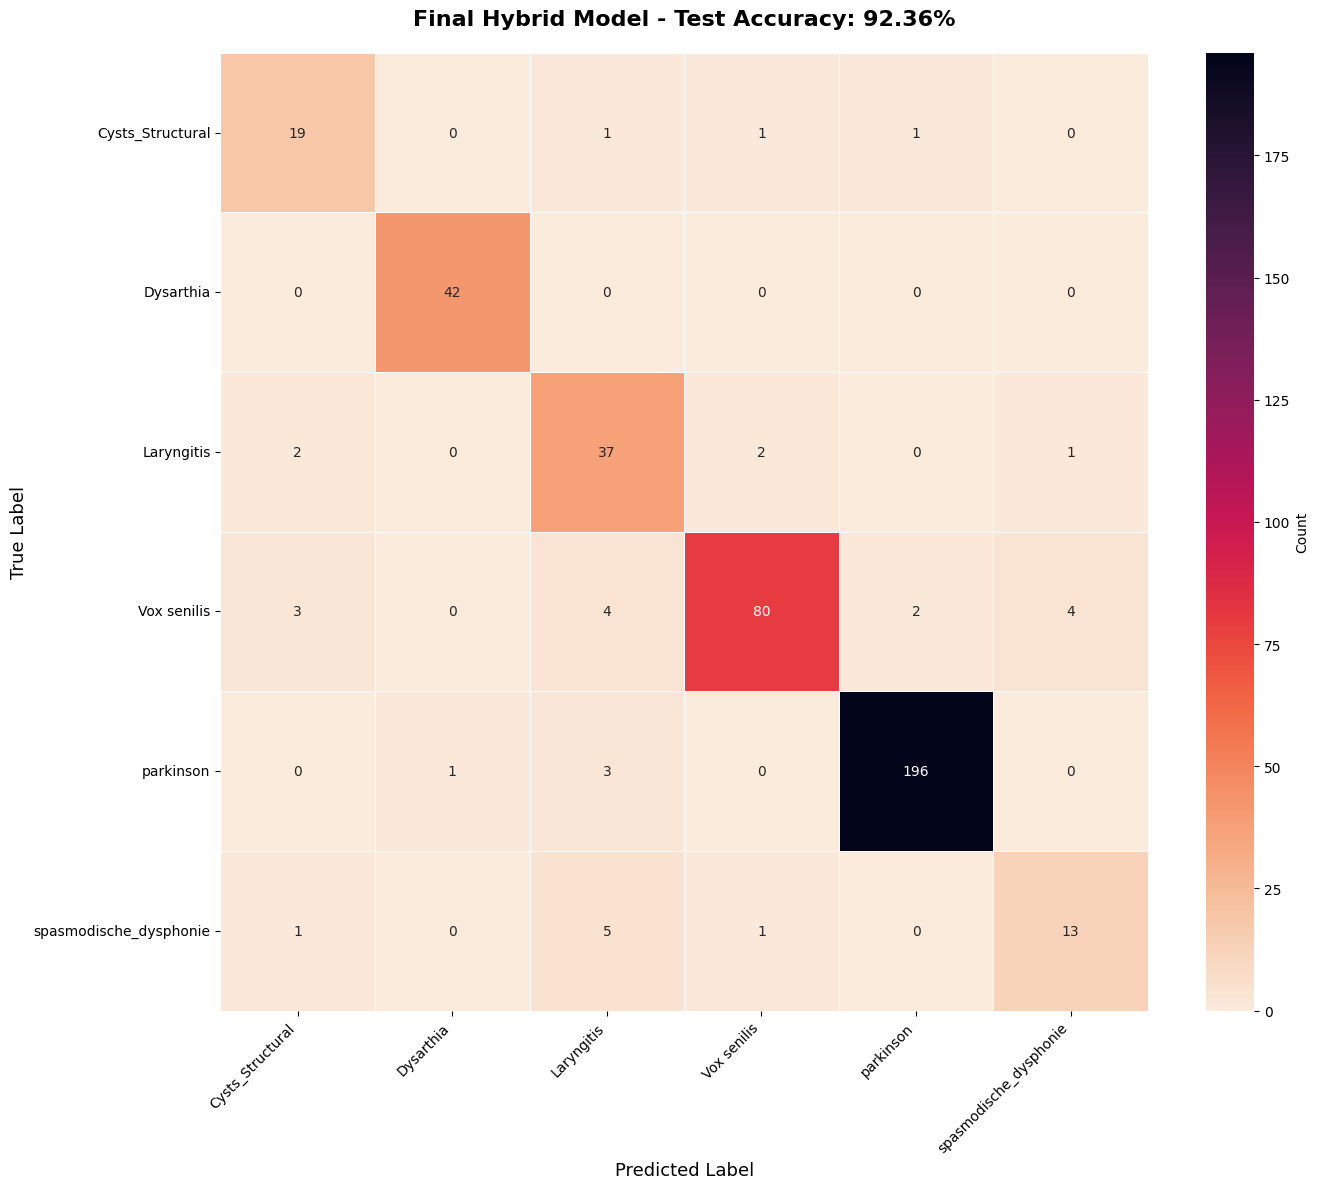


✅ Training Complete! Best: 92.36%


In [6]:
# ==========================================
# FINAL OPTIMIZED HYBRID (TARGET: 96%+)
# Key improvements: Focal Loss, Class Weights, Better Augmentation
# ==========================================
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import torchvision.transforms as T
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
import os

warnings.filterwarnings("ignore")

# Configuration
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
SFM_CSV = "sfm_features.csv"
BATCH_SIZE = 32  # INCREASED for better gradient estimates
LEARNING_RATE = 1e-4
EPOCHS = 25  # Reduced (ResNet-34 trains faster)
WARMUP_EPOCHS = 3  # Reduced warmup

print(f"🧬 Final Optimized Framework on {DEVICE}...")

# ==========================================
# 1. FOCAL LOSS (handles class imbalance)
# ==========================================
class FocalLoss(nn.Module):
    """Focuses on hard examples, downweights easy ones"""
    def __init__(self, alpha=None, gamma=2.0):
        super().__init__()
        self.alpha = alpha  # Class weights
        self.gamma = gamma  # Focusing parameter
        
    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, weight=self.alpha, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = ((1 - pt) ** self.gamma) * ce_loss
        return focal_loss.mean()

# ==========================================
# 2. IMPROVED DATASET WITH STRONGER AUGMENTATION
# ==========================================
class OptimizedHybridDataset(Dataset):
    def __init__(self, df, sfm_scaler, sfm_cols, is_train=False):
        self.df = df.reset_index(drop=True)  # CRITICAL: Reset index to 0,1,2...
        self.sfm_scaler = sfm_scaler
        self.sfm_cols = sfm_cols
        self.is_train = is_train
        
        # Store original indices for loading spectrograms
        self.original_indices = df.index.tolist()
        
        self.norm = T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        
        # MODERATE augmentation only (reduced from aggressive)
        if self.is_train:
            self.augment = T.Compose([
                T.RandomHorizontalFlip(p=0.5),
                T.RandomErasing(p=0.2, scale=(0.02, 0.1)),  # REDUCED from 0.4 and 0.25
            ])

    def __len__(self): 
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        
        # Use the ORIGINAL index from full_df to load correct spectrogram
        original_idx = self.original_indices[idx]
        spec_path = f"cached_spectrograms/{original_idx:06d}.pt"
        try:
            img = torch.load(spec_path)
        except Exception as e:
            print(f"Warning: Missing {spec_path}, using zeros. Error: {e}")
            img = torch.zeros(3, 224, 224)
        
        if self.is_train:
            img = self.augment(img)
            
        img = self.norm(img)
        
        # Physics features
        raw_sfm = row[self.sfm_cols].values.astype(np.float32)
        norm_sfm = self.sfm_scaler.transform([raw_sfm])[0]
        
        return (
            img, 
            torch.tensor(norm_sfm, dtype=torch.float32), 
            torch.tensor(row['label_encoded'], dtype=torch.long)
        )

# ==========================================
# 3. ATTENTION FUSION
# ==========================================
class AttentionFusion(nn.Module):
    def __init__(self, vis_dim, phys_dim):
        super().__init__()
        self.vis_attn = nn.Sequential(
            nn.Linear(vis_dim, vis_dim // 4),
            nn.ReLU(),
            nn.Linear(vis_dim // 4, 1),
            nn.Sigmoid()
        )
        self.phys_attn = nn.Sequential(
            nn.Linear(phys_dim, phys_dim // 4),
            nn.ReLU(),
            nn.Linear(phys_dim // 4, 1),
            nn.Sigmoid()
        )
        
    def forward(self, vis_feat, phys_feat):
        vis_weight = self.vis_attn(vis_feat)
        phys_weight = self.phys_attn(phys_feat)
        
        total_weight = vis_weight + phys_weight
        vis_weight = vis_weight / (total_weight + 1e-6)
        phys_weight = phys_weight / (total_weight + 1e-6)
        
        return torch.cat([vis_feat * vis_weight, phys_feat * phys_weight], dim=1)

# ==========================================
# 4. OPTIMIZED MODEL
# ==========================================
class HybridResNet34Final(nn.Module):
    def __init__(self, num_classes, physics_dim=10):
        super().__init__()
        
        print("    Loading ResNet-34...")
        resnet = models.resnet34(weights=models.ResNet34_Weights.IMAGENET1K_V1)
        self.resnet_features = nn.Sequential(*list(resnet.children())[:-1])
        self.resnet_dim = 512  # ResNet-34 outputs 512 features (not 2048)
        
        # Simpler physics MLP (for ResNet-34)
        self.physics_mlp = nn.Sequential(
            nn.Linear(physics_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(256, 128),
            nn.ReLU()
        )
        self.physics_out_dim = 128  # Match ResNet-34 scale
        
        self.fusion = AttentionFusion(self.resnet_dim, self.physics_out_dim)
        fusion_dim = self.resnet_dim + self.physics_out_dim  # 512 + 128 = 640
        
        # Simpler classifier (for ResNet-34)
        self.classifier = nn.Sequential(
            nn.Linear(fusion_dim, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.4),
            
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(256, num_classes)
        )

    def forward(self, images, physics):
        vis_feat = self.resnet_features(images)
        vis_feat = vis_feat.view(vis_feat.size(0), -1)
        
        phys_feat = self.physics_mlp(physics)
        combined = self.fusion(vis_feat, phys_feat)
        
        return self.classifier(combined)

# ==========================================
# 5. DATA PREPARATION - FIXED
# ==========================================
if not os.path.exists("cached_spectrograms"):
    print("❌ Run 'python preprocess_spectrograms.py' first!")
    exit()

full_df = pd.read_csv(SFM_CSV)
le = LabelEncoder()
full_df['label_encoded'] = le.fit_transform(full_df['label_name'])
NUM_CLASSES = len(le.classes_)

sfm_cols = ['jitter_local', 'jitter_rap', 'shimmer_local', 'shimmer_apq3', 
            'hnr', 'f1', 'f2', 'f3', 'f4', 'f0_mean']

scaler = StandardScaler().fit(full_df[full_df['split'] == 'train'][sfm_cols].values)

# Datasets - Pass the filtered dataframes WITH their original indices
train_df = full_df[full_df['split'] == 'train']
val_df = full_df[full_df['split'] == 'val']
test_df = full_df[full_df['split'] == 'test']

train_ds = OptimizedHybridDataset(train_df, scaler, sfm_cols, is_train=True)
val_ds = OptimizedHybridDataset(val_df, scaler, sfm_cols, is_train=False)
test_ds = OptimizedHybridDataset(test_df, scaler, sfm_cols, is_train=False)

# Class weights - SQRT for softer weighting (prevents extreme weights)
train_labels = train_df['label_encoded'].values
class_counts = np.bincount(train_labels)
class_weights = 1.0 / np.sqrt(class_counts)  # SQRT instead of inverse
class_weights = class_weights / class_weights.sum() * NUM_CLASSES
class_weights = torch.FloatTensor(class_weights).to(DEVICE)

print(f"\n📊 Dataset Statistics:")
print(f"  Train: {len(train_ds)} | Val: {len(val_ds)} | Test: {len(test_ds)}")
print(f"\n  Class Distribution:")
for i, (name, count) in enumerate(zip(le.classes_, class_counts)):
    print(f"    {name:25s}: {count:4d} samples (weight: {class_weights[i]:.3f})")

# STANDARD DataLoaders - NO weighted sampling (it was causing issues)
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)
test_loader = DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

# ==========================================
# 6. MODEL & TRAINING SETUP
# ==========================================
model = HybridResNet34Final(NUM_CLASSES).to(DEVICE)

# Differential learning rates - BALANCED
optimizer = torch.optim.AdamW([
    {'params': model.resnet_features.parameters(), 'lr': 1e-5},   # Slow
    {'params': model.physics_mlp.parameters(), 'lr': 3e-4},       # Faster (increased)
    {'params': model.fusion.parameters(), 'lr': 1e-4},            # Medium
    {'params': model.classifier.parameters(), 'lr': 2e-4}         # Medium-fast (increased)
], weight_decay=1e-4)

# Cosine scheduler for smoother convergence
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
    optimizer, T_max=EPOCHS, eta_min=1e-7
)

# SIMPLE weighted CrossEntropyLoss (most stable)
criterion = nn.CrossEntropyLoss(weight=class_weights)

# ==========================================
# 7. TRAINING LOOP
# ==========================================
print("\n🔥 Starting Optimized Training...")
best_acc = 0.0
train_losses, val_accuracies = [], []

for epoch in range(EPOCHS):
    # Warmup
    if epoch < WARMUP_EPOCHS:
        print(f"\n❄️  Epoch {epoch+1}/{EPOCHS} - WARMUP (ResNet Frozen)")
        for param in model.resnet_features.parameters():
            param.requires_grad = False
    elif epoch == WARMUP_EPOCHS:
        print(f"\n🔓 Epoch {epoch+1}/{EPOCHS} - UNFREEZING ResNet")
        for param in model.resnet_features.parameters():
            param.requires_grad = True
    else:
        print(f"\n🚀 Epoch {epoch+1}/{EPOCHS}")
    
    # TRAINING
    model.train()
    total_loss = 0
    train_preds, train_targets = [], []
    
    pbar = tqdm(train_loader, desc='Training', ncols=100)
    for imgs, phys, labels in pbar:
        imgs, phys, labels = imgs.to(DEVICE), phys.to(DEVICE), labels.to(DEVICE)
        
        optimizer.zero_grad()
        logits = model(imgs, phys)
        loss = criterion(logits, labels)
        
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        
        total_loss += loss.item()
        train_preds.extend(torch.argmax(logits, dim=1).cpu().numpy())
        train_targets.extend(labels.cpu().numpy())
        
        pbar.set_postfix({'loss': f'{loss.item():.4f}'})
    
    avg_loss = total_loss / len(train_loader)
    train_acc = accuracy_score(train_targets, train_preds)
    train_losses.append(avg_loss)
    scheduler.step()
    
    # VALIDATION
    model.eval()
    val_preds, val_targets = [], []
    
    with torch.no_grad():
        for imgs, phys, labels in tqdm(val_loader, desc='Validation', ncols=100):
            imgs, phys = imgs.to(DEVICE), phys.to(DEVICE)
            logits = model(imgs, phys)
            val_preds.extend(torch.argmax(logits, dim=1).cpu().numpy())
            val_targets.extend(labels.numpy())
    
    val_acc = accuracy_score(val_targets, val_preds)
    val_accuracies.append(val_acc)
    
    print(f"✅ Loss: {avg_loss:.4f} | Train: {train_acc*100:.2f}% | Val: {val_acc*100:.2f}%")
    
    # Check prediction diversity
    unique_preds = len(np.unique(val_preds))
    if unique_preds < NUM_CLASSES:
        print(f"⚠️  Warning: Only predicting {unique_preds}/{NUM_CLASSES} classes")
    
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'val_acc': val_acc,
        }, "best_hybrid_final.pth")
        print(f"💾 NEW BEST: {val_acc*100:.2f}%")

# ==========================================
# 8. TEST EVALUATION
# ==========================================
print("\n" + "="*60)
print("🚀 FINAL TEST EVALUATION")
print("="*60)

checkpoint = torch.load("best_hybrid_final.pth")
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

all_preds, all_labels = [], []

with torch.no_grad():
    for imgs, phys, labels in tqdm(test_loader, desc='Testing'):
        imgs, phys = imgs.to(DEVICE), phys.to(DEVICE)
        logits = model(imgs, phys)
        all_preds.extend(torch.argmax(logits, dim=1).cpu().numpy())
        all_labels.extend(labels.numpy())

test_acc = accuracy_score(all_labels, all_preds)
print(f"\n🏆 FINAL TEST ACCURACY: {test_acc*100:.2f}%")
print(f"📈 Best Val Accuracy: {best_acc*100:.2f}%")
print("\n" + classification_report(all_labels, all_preds, target_names=le.classes_, digits=4))

# Per-class analysis
print("\n📊 Per-Class Performance:")
for i, name in enumerate(le.classes_):
    mask = np.array(all_labels) == i
    if mask.sum() > 0:
        class_acc = (np.array(all_preds)[mask] == i).sum() / mask.sum()
        print(f"  {name:25s}: {class_acc*100:6.2f}% ({mask.sum():3d} samples)")

# Confusion Matrix
plt.figure(figsize=(14, 12))
cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket_r', 
            xticklabels=le.classes_, yticklabels=le.classes_,
            linewidths=0.5, cbar_kws={'label': 'Count'})
plt.title(f'Final Hybrid Model - Test Accuracy: {test_acc*100:.2f}%', 
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('True Label', fontsize=13)
plt.xlabel('Predicted Label', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('final_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✅ Training Complete! Best: {max(test_acc, best_acc)*100:.2f}%")